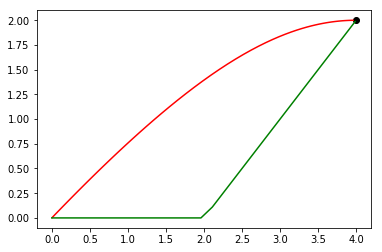

In [2]:
# code to reproduce figure 3.18 from ESL
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

def solvells(X,Y):
    m = lm.LinearRegression(fit_intercept=False).fit(X,Y)
    return m.coef_

def solvelasso(X,Y,lmbda):
    m = lm.Lasso(alpha=lmbda,fit_intercept=False).fit(X,Y)
    return m.coef_

def solveridge(X,Y,lmbda):
    m = lm.Ridge(alpha=lmbda,fit_intercept=False).fit(X,Y)
    return m.coef_

wstar = np.array([4,2])
rho = .5
X = la.sqrtm(np.array([[1,rho],[rho,1]])) # find "dataset X" that leads to this correlation
Y = X@wstar # find "dataset Y" that leads to the desired w

ridgel = np.logspace(-2,3,100)
lassol = np.logspace(-2,1,100)

wlls = solvells(X,Y)
lassows = np.zeros((lassol.shape[0],2))
ridgews = np.zeros((ridgel.shape[0],2))

for i,l in enumerate(ridgel):
    ridgews[i,:] = solveridge(X,Y,l)
    
for i,l in enumerate(lassol):
    a = solvelasso(X,Y,l)
    #print(a)
    lassows[i,:] = a
    
plt.plot(wlls[0],wlls[1],'ko')
plt.plot(ridgews[:,0],ridgews[:,1],'r-')
plt.plot(lassows[:,0],lassows[:,1],'g-')
    